In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
import os

# 1) Error plots
meta_error_list = []
for i in range(8):
    with open('./varying_noise/noise_' + str(i) + '.pkl','rb') as f:
        x, t, error_list, theta_list, estimated_theta, true_theta, inferred_gvec, errors, em_param, data_param, euler_param, sim_param = pickle.load(f)
    meta_error_list.append((x.shape, error_list, theta_list, estimated_theta, true_theta, inferred_gvec, errors, em_param, data_param, euler_param, sim_param))

In [2]:
parval = 8
error_plot = np.zeros((3, parval))
noise = np.zeros(parval)
for i in range(parval):
    # noise[i] = meta_error_list[i][10].gvec[0]
    noise[i] = i
    error_plot[0, i] = meta_error_list[i][6][0]
    error_plot[1, i] = meta_error_list[i][6][1]
    error_plot[2, i] = meta_error_list[i][6][4]

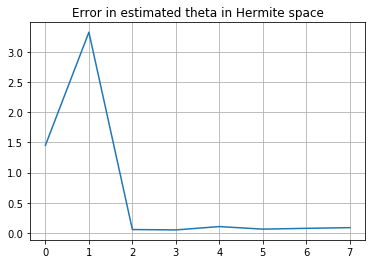

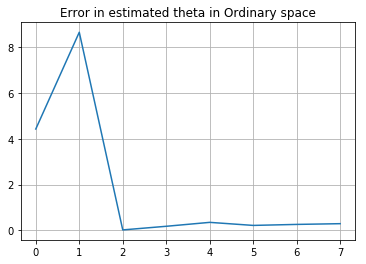

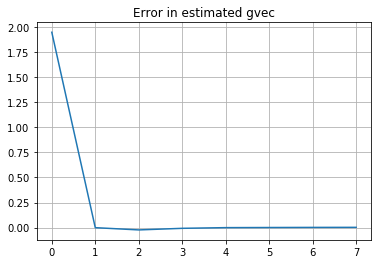

[[  1.45195476e+00   3.32395187e+00   5.67782851e-02   5.04628938e-02
    1.05776144e-01   6.34696077e-02   7.68363924e-02   8.80645322e-02]
 [  4.42655076e+00   8.65094446e+00   2.19029586e-02   1.80347514e-01
    3.51769287e-01   2.18526619e-01   2.62180802e-01   2.94338094e-01]
 [  1.95132967e+00  -1.34237274e-03  -2.38323557e-02  -7.93376106e-03
   -1.05308864e-03   1.38150528e-04   1.26121691e-03   1.88208697e-03]]


In [3]:
# 1a) Error in estimated theta in Hermite space
fig = plt.figure()
ax = fig.gca()
plt.plot(noise, error_plot[0, ])
plt.title('Error in estimated theta in Hermite space')
plt.grid()
plt.show()

# 1b) Error in estimated theta in Ordinary space
fig = plt.figure()
ax = fig.gca()
plt.plot(noise, error_plot[1, ])
plt.title('Error in estimated theta in Ordinary space')
plt.grid()
plt.show()

# 1c) Error in estimated gvec
fig = plt.figure()
ax = fig.gca()
plt.plot(noise, error_plot[2, ])
plt.title('Error in estimated gvec')
plt.grid()
plt.show()

print(error_plot)

In [9]:
print(meta_error_list[1][3].ordinary, meta_error_list[1][4].ordinary)

[[ 0.        ]
 [ 3.63982778]
 [-2.71664938]
 [ 0.36480164]] [[ 1.]
 [ 1.]
 [-1.]
 [ 0.]]


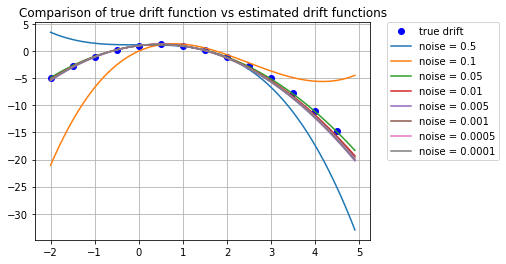

In [10]:
# 2) Comparison of true drift function vs estimated drift function
def f(theta, x):
    return (theta[0, 0] + theta[1, 0]*x + theta[2, 0]*(x**2) + theta[3, 0]*(x**3))

x1 = np.arange(-2.0, 5.0, 0.5)
x2 = np.arange(-2.0, 5.0, 0.1)

fig = plt.figure()
ax = fig.gca()
plt.plot(x1, f(np.array(meta_error_list[0][4].ordinary), x1), 'bo', label='true drift')
for i in range(parval):
    plt.plot(x2, f(np.array(meta_error_list[i][3].ordinary), x2), label='noise = '+str(meta_error_list[i][10].gvec[0]))

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('Comparison of true drift function vs estimated drift functions')
plt.grid()
plt.show()